In [2]:
import numpy as np
from scipy.signal import kaiserord, lfilter, firwin, freqz
from matplotlib import pyplot as plt

In [3]:
sfreq = 200.
n_samples = 1000
times = np.arange(n_samples) / sfreq

x = np.cos(2*np.pi*0.5*times) + 0.2*np.sin(2*np.pi*2.5*times+0.1) + \
        0.2*np.sin(2*np.pi*15.3*times) + 0.1*np.sin(2*np.pi*16.7*times + 0.1) + \
            0.1*np.sin(2*np.pi*23.45*times+.8)

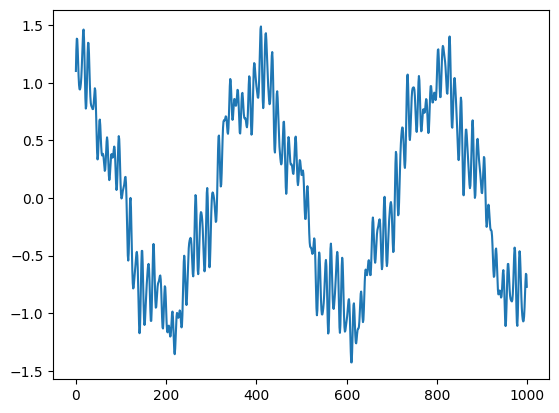

In [4]:
plt.plot(x)

In [5]:
nyq_rate = sfreq / 2.
width = 5. / nyq_rate # 5 Hz transition width
ripple_db = 60. # 60 dB attenuation
N, beta = kaiserord(ripple_db, width)

cutoff_hz = 10.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

filtered__x = lfilter(taps, 1.0, x)

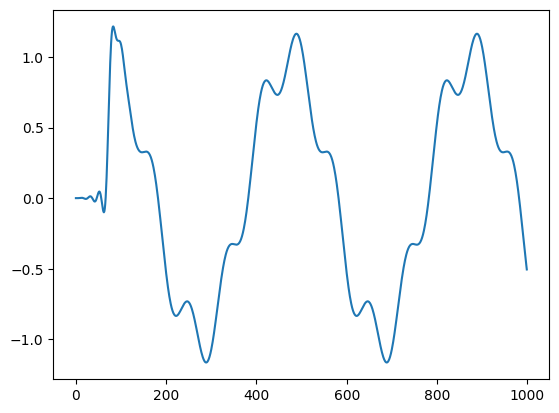

In [6]:
plt.plot(filtered__x)

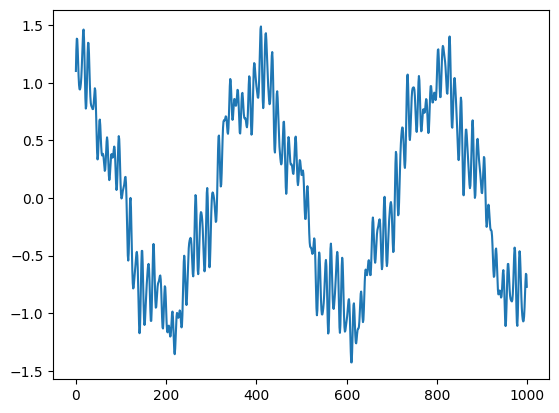

In [8]:
import mne

plt.plot(x)

In [16]:
x1 = mne.filter.filter_data(x, sfreq, l_freq=0.5, h_freq=4, verbose=True, copy=True)
x2 = mne.filter.filter_data(x, sfreq, l_freq=4, h_freq=8, verbose=True, copy=True)
x3 = mne.filter.filter_data(x, sfreq, l_freq=8, h_freq=12, verbose=True, copy=True)
x4 = mne.filter.filter_data(x, sfreq, l_freq=12, h_freq=30, verbose=True, copy=True)
x5 = mne.filter.filter_data(x, sfreq, l_freq=30, h_freq=80, verbose=True, copy=True)
 

Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1321 samples (6.605 s)

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter 

/tmp/ipykernel_1805/3404374408.py:1: RuntimeWarning: filter_length (1321) is longer than the signal (1000), distortion is likely. Reduce filter length or filter a longer signal.
  x1 = mne.filter.filter_data(x, sfreq, l_freq=0.5, h_freq=4, verbose=True, copy=True)


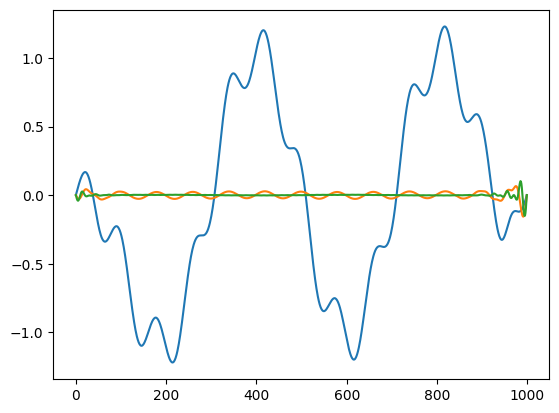

In [17]:
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.show()

In [12]:
x.shape

(1000,)